### Retail dataset of a global superstore for 4 years,perform EDA

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv(r"C:\Users\vishal\Desktop\it\train.csv\train.csv")

In [28]:
df.shape

(9800, 18)

In [29]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [31]:
pd.isnull(df).sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [32]:
df.drop(['Product Name','Postal Code',],axis = 1,inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Sales          9800 non-null   float64
dtypes: float64(1), int64(1), object(14)
memory usage: 1.2+ MB


In [34]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Sales'],
      dtype='object')

### Sales Overview:

In [35]:
total_sales = df['Sales'].sum()

print(f'Total Sales: {total_sales:.2f}')

Total Sales: 2261536.78


### Time-based Analysis:

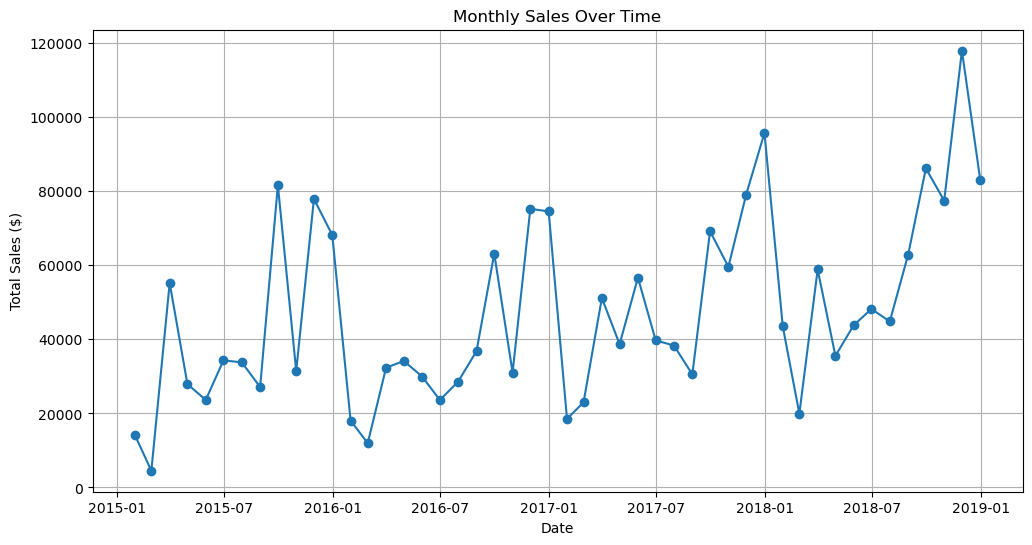

In [36]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')


# Set 'Order Date' as the DataFrame index for time-based analysis
df.set_index('Order Date', inplace=True)

# Resample data to monthly frequency and calculate total sales for each month
monthly_sales = df['Sales'].resample('M').sum()

# Plotting time-based analysis (monthly sales)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()



### Geographical Analysis:

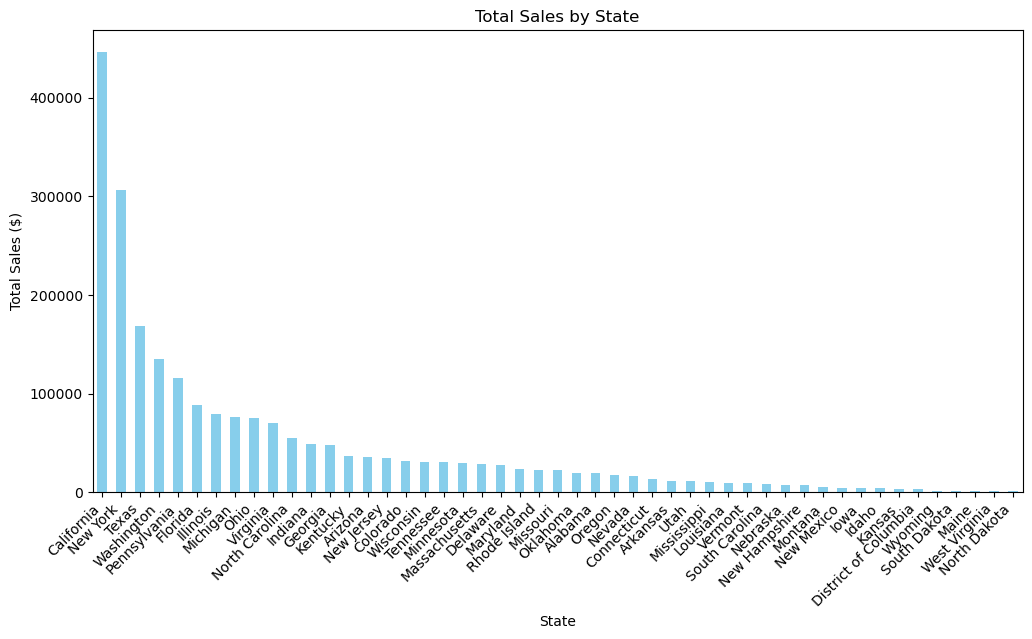

In [12]:
# Group data by 'Country' and calculate total sales for each country
country_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotting geographical analysis (total sales by country)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


### Shipping Analysis:

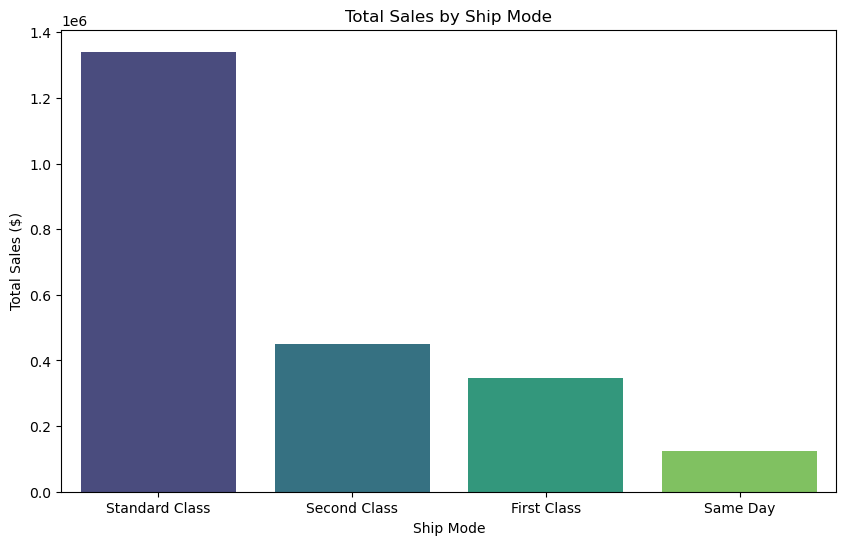

In [13]:
# Group data by 'Ship Mode' and calculate total sales for each shipping mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

# Plotting shipping analysis (total sales by ship mode)
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='viridis')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales ($)')
plt.show()


### Customer Segmentation

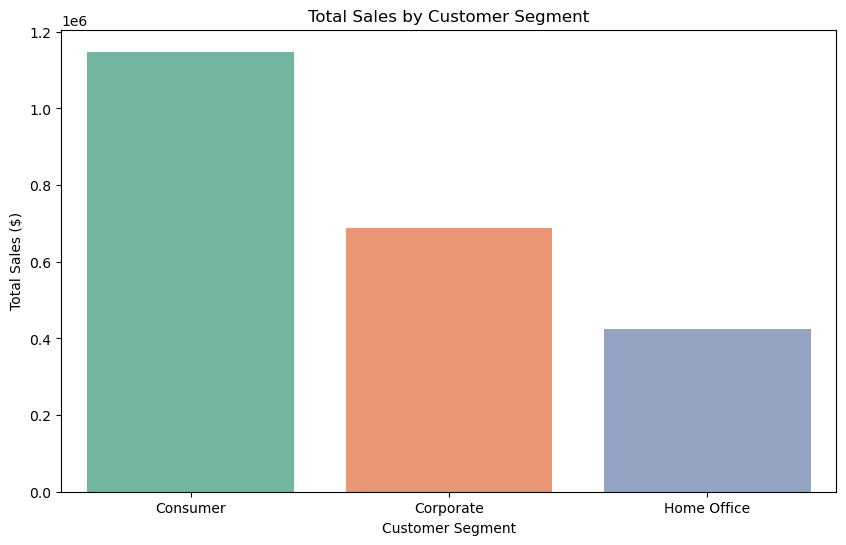

In [14]:
# Group data by 'Segment' and calculate total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Plotting customer segmentation analysis (total sales by segment)
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='Set2')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.show()


### Product Analysis:

Top-selling Products:
Category         Sub-Category
Technology       Phones          327782.4480
Furniture        Chairs          322822.7310
Office Supplies  Storage         219343.3920
Furniture        Tables          202810.6280
Office Supplies  Binders         200028.7850
Technology       Machines        189238.6310
                 Accessories     164186.7000
                 Copiers         146248.0940
Furniture        Bookcases       113813.1987
Office Supplies  Appliances      104618.4030
Name: Sales, dtype: float64


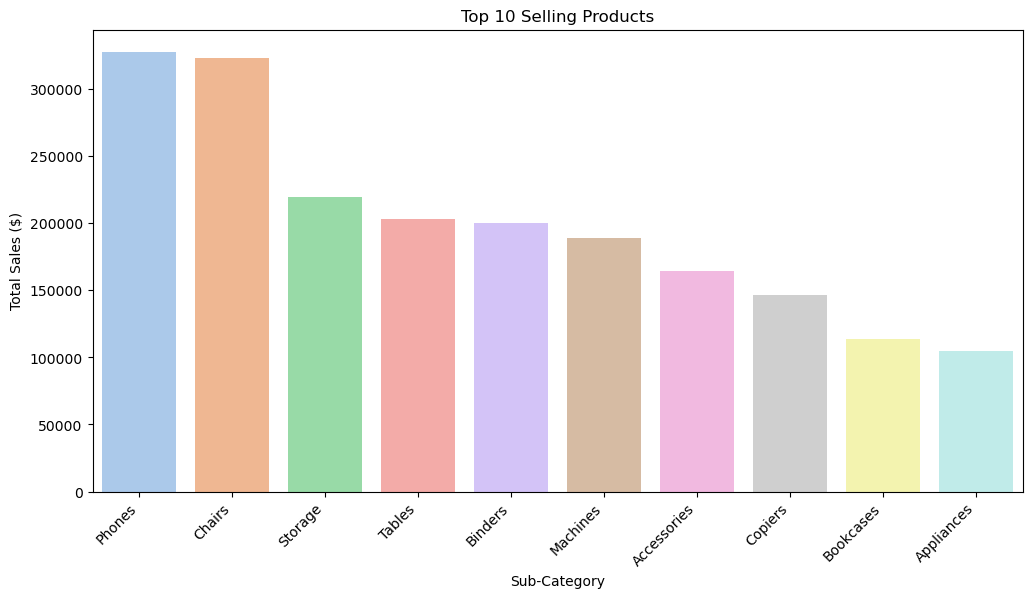

In [17]:

# Group data by 'Category', 'Sub-Category', and 'Product Name' and calculate total sales for each product
product_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False)

# Print the top-selling products
print("Top-selling Products:")
print(product_sales.head(10))

# Plotting product analysis (total sales by product)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.head(10).index.get_level_values('Sub-Category'), y=product_sales.head(10).values, palette='pastel')
plt.title('Top 10 Selling Products')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


### Regional Comparison:

Regional Sales Comparison:
Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


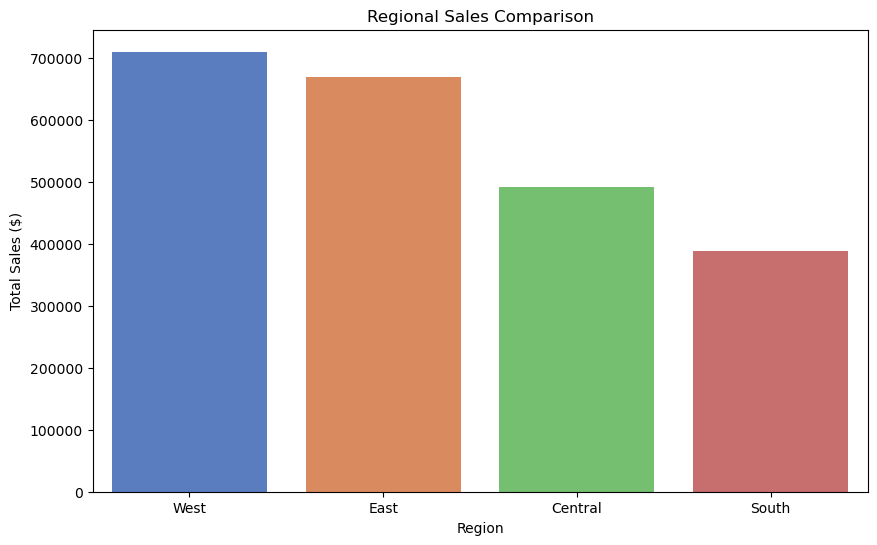

In [16]:
# Group data by 'Region' and calculate total sales for each region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Print the regional sales comparison
print("Regional Sales Comparison:")
print(region_sales)

# Plotting regional sales comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='muted')
plt.title('Regional Sales Comparison')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()


Thank You